# TSF TASK 3( Exploratory Data Analysis )

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
#Loading the data
df=pd.read_csv("SampleSuperstore.csv")

In [5]:
df[0:2]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820


In [6]:
#removing the duplicates
df.duplicated().sum()

df=df.drop_duplicates()

In [7]:
#droping the country column
df["Country"].value_counts()
df=df.drop("Country",axis=True)

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64


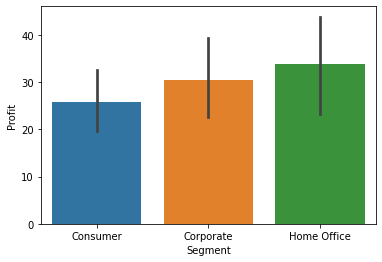

In [8]:
# Bar plot between segment and profit
print(df["Segment"].value_counts())

sns.barplot(x = 'Segment',y = 'Profit',data = df)
plt.show()

Since we have less number of home office segment but still we have recived maximun profit from this segment

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64


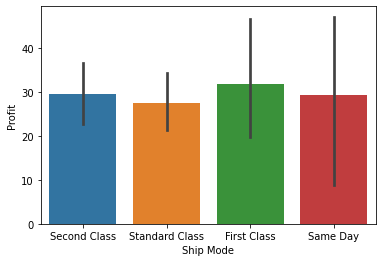

In [9]:
# Bar plot between ship mode and profit
print(df["Ship Mode"].value_counts())

sns.barplot(x = 'Ship Mode',y = 'Profit',data = df)
plt.show()

We will have to focus more on first class shiping mode orsecond class shipping mode

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64


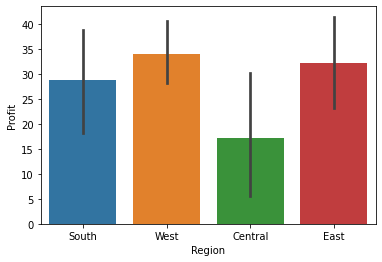

In [10]:
#barplot between region and profit
print(df["Region"].value_counts())
sns.barplot(x = 'Region',y = 'Profit',data = df)
plt.show()

we should focus on central region to increase the overall profit from each region.


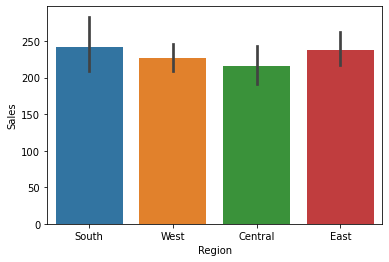

In [11]:
#barplot bwtween region and sales
sns.barplot(x = 'Region',y = 'Sales',data = df)
plt.show()

#from this barplot we can conclude that no of sales in central region are good but profit is less

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64


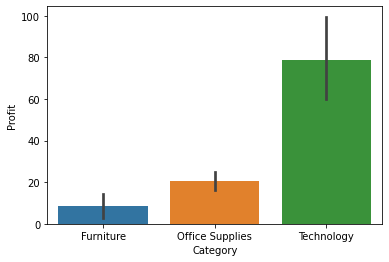

In [12]:
#barplot between category and profit
print(df["Category"].value_counts())
sns.barplot(x = 'Category',y = 'Profit',data = df)
plt.show()

technology category made huge profit , we should also focus on remaining categories as well

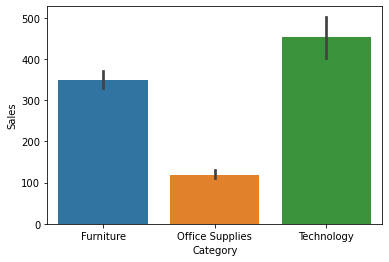

In [13]:
#barplot between category and sales
sns.barplot(x = 'Category',y = 'Sales',data = df)
plt.show()

sales graphs of each category shows that office supplies are sold in less number.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Total quantity sold per category'}, xlabel='Quantity', ylabel='count'>

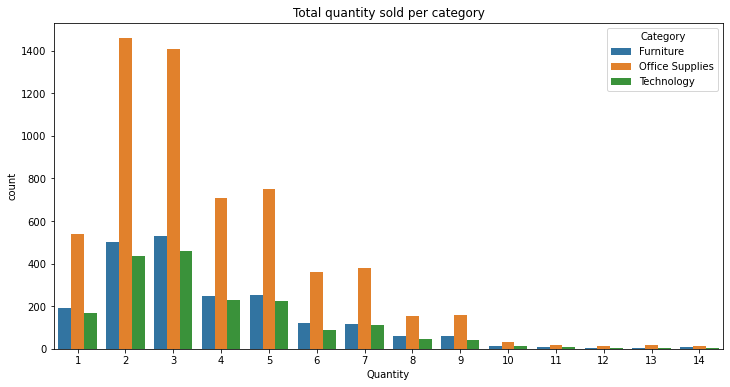

In [14]:
#Count of total quantity sold per category
plt.figure(figsize=(12, 6))
plt.title('Total quantity sold per category')
sns.countplot(df['Quantity'], hue = df.Category) 

#no of items sold in quantity is more for office supplies but profit is maximum from technology 

<AxesSubplot:xlabel='Quantity', ylabel='Sub-Category'>

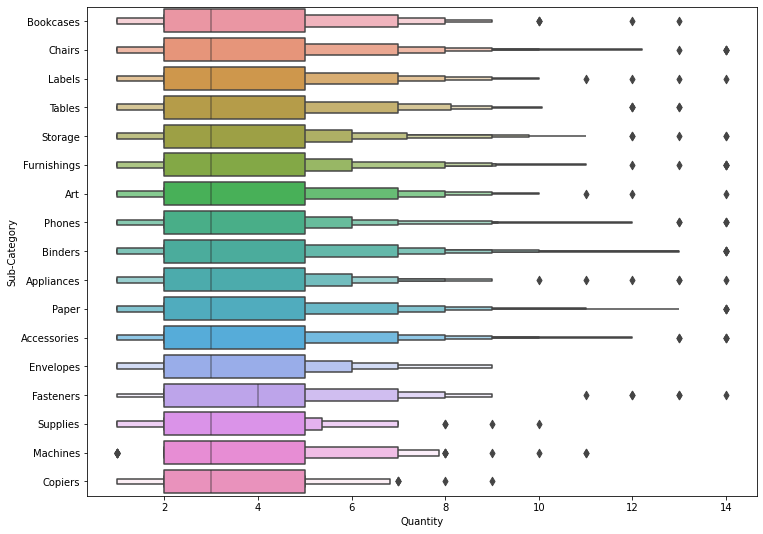

In [15]:
#calculate mean quantity for subcategory 
plt.figure(figsize=(12,9))
sns.boxenplot(y = 'Sub-Category', x = 'Quantity', data=df ) 

mean quantity for Fasteners subcategory is more as compare tot he rest

<AxesSubplot:xlabel='Quantity', ylabel='Category'>

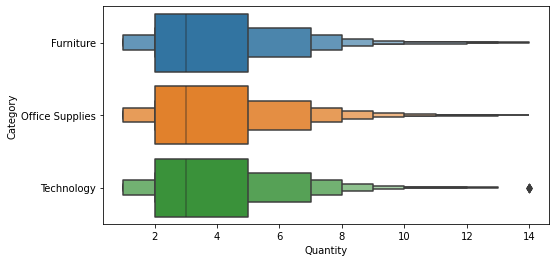

In [16]:
#box plot quantity and category
plt.figure(figsize=(8,4))
sns.boxenplot(y = 'Category', x = 'Quantity', data=df ) 

In [17]:
# segment, state and category which made maximum sales
df[df["Sales"]==df.Sales.max()][["Segment","State","Category","Sales","Profit"]]

,Segment,State,Category,Sales,Profit
2697,Home Office,Florida,Technology,22638.48,-1811.0784


In [18]:
#segment, subcategory state and category which made maximum profit
df[df["Profit"]==df.Profit.max()][["Segment","Sub-Category","State","Category","Sales","Profit"]]

,Segment,Sub-Category,State,Category,Sales,Profit
6826,Corporate,Copiers,Indiana,Technology,17499.95,8399.976


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   City          9977 non-null   object 
 3   State         9977 non-null   object 
 4   Postal Code   9977 non-null   int64  
 5   Region        9977 non-null   object 
 6   Category      9977 non-null   object 
 7   Sub-Category  9977 non-null   object 
 8   Sales         9977 non-null   float64
 9   Quantity      9977 non-null   int64  
 10  Discount      9977 non-null   float64
 11  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1013.3+ KB


In [20]:
#statstics insights of data
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [21]:
#correlation of data
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


<AxesSubplot:>

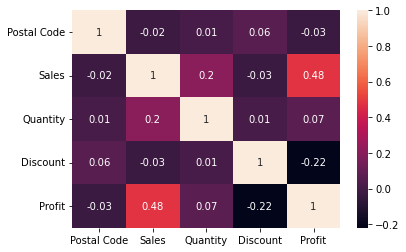

In [22]:
#heatmap 
sns.heatmap(np.round(df.corr(),2), annot=True)

we should more focus on sales vs profit ratio

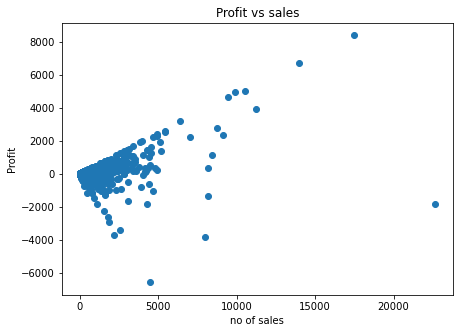

In [23]:
#plot the scatter plot of sales and profit variable in data
plt.figure(figsize=(7,5))
plt.scatter(df.Sales,df.Profit)
plt.title("Profit vs sales")
plt.xlabel("no of sales")
plt.ylabel("Profit")
plt.show()

We are also facing loss we should make more profit

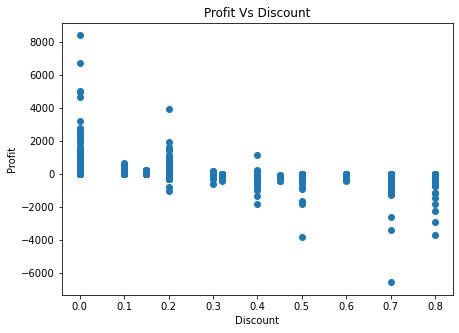

In [24]:
#plot the scatter plot of discount and profit variable in data
plt.figure(figsize=(7,5))
plt.scatter(df.Discount,df.Profit)
plt.title("Profit Vs Discount")
plt.ylabel("Profit")
plt.xlabel("Discount")
plt.show()

We should cut out the dicount to make profit since profit and discount are in inverse relateed

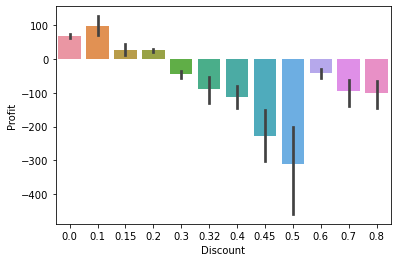

In [25]:
#barplot between discount and profit 
sns.barplot(x = 'Discount',y = 'Profit',data = df)
plt.show()

increase in discount gives us loss

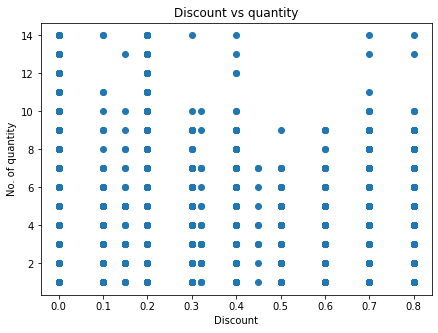

In [26]:
#plot the scatter plot of discount and quantity variable in data
plt.figure(figsize=(7,5))
plt.scatter(df.Discount,df.Quantity)
plt.title("Discount vs quantity")
plt.xlabel("Discount")
plt.ylabel("No. of quantity")
plt.show()

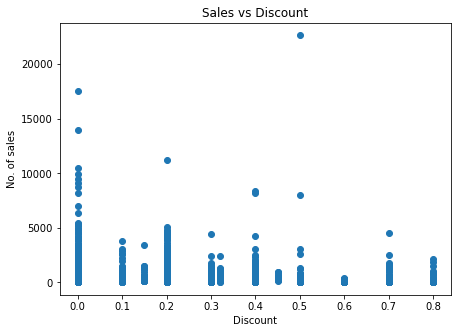

In [27]:
#plot the scatter plot of sales and discount variable in data
plt.figure(figsize=(7,5))
plt.scatter(df.Discount,df.Sales)
plt.title("Sales vs Discount")
plt.xlabel("Discount")
plt.ylabel("No. of sales")
plt.show()

Thats conclude this task since we should focus on making more sales with profit gain, should decrese the discounts, Try to make profit from each region and category. 